In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp


In [2]:
import zipfile

In [3]:
zipfile.ZipFile('names.zip').extractall('.')

In [4]:
ls names

 Volume in drive C is Windows
 Volume Serial Number is C0B5-CB21

 Directory of C:\Users\marjory joseph\Documents\cop4283\Assignment 7\names

11/29/2022  04:53 PM    <DIR>          .
11/29/2022  04:53 PM    <DIR>          ..
12/02/2022  04:19 PM           316,364 NationalReadMe.pdf
12/02/2022  04:19 PM            24,933 yob1880.txt
12/02/2022  04:19 PM            24,065 yob1881.txt
12/02/2022  04:19 PM            26,559 yob1882.txt
12/02/2022  04:19 PM            26,002 yob1883.txt
12/02/2022  04:19 PM            28,670 yob1884.txt
12/02/2022  04:19 PM            28,625 yob1885.txt
12/02/2022  04:19 PM            29,822 yob1886.txt
12/02/2022  04:19 PM            29,531 yob1887.txt
12/02/2022  04:19 PM            33,064 yob1888.txt
12/02/2022  04:19 PM            32,297 yob1889.txt
12/02/2022  04:19 PM            33,621 yob1890.txt
12/02/2022  04:19 PM            33,186 yob1891.txt
12/02/2022  04:19 PM            36,542 yob1892.txt
12/02/2022  04:19 PM            35,433 yob1893.txt
12/

In [5]:
pd.options.display.max_rows = 10

In [6]:
#from class example files

open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21842\n',
 'Isabella,F,19910\n',
 'Emma,F,18803\n',
 'Olivia,F,17322\n',
 'Ava,F,15503\n',
 'Emily,F,14258\n',
 'Abigail,F,13248\n',
 'Madison,F,12389\n',
 'Mia,F,11530\n',
 'Chloe,F,10991\n']

In [7]:
pd.read_csv('names/yob2011.txt', names=['name','sex','number']).assign(year=2011)

,name,sex,number,year
0,Sophia,F,21842,2011
1,Isabella,F,19910,2011
2,Emma,F,18803,2011
3,Olivia,F,17322,2011
4,Ava,F,15503,2011
...,...,...,...,...
33903,Zylar,M,5,2011
33904,Zylas,M,5,2011
33905,Zyran,M,5,2011
33906,Zyshawn,M,5,2011


In [8]:
#from class example files
allyears = pd.concat(pd.read_csv(f'names/yob{year}.txt',
                                 names=['name','sex','number']).assign(year=year)
                     for year in range(1880, 2019))
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018


In [9]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 74.7+ MB


In [10]:
allyears_indexed = allyears.groupby(['sex','name']).number.sum()
allyears_indexed

sex  name     
F    Aabha        35
     Aabidah       5
     Aabriella    38
     Aada         13
     Aadaya        8
                  ..
M    Zyus         11
     Zyvion        5
     Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: number, Length: 109173, dtype: int64

In [11]:
female= allyears_indexed.loc[('F')]
female

name
Aabha        35
Aabidah       5
Aabriella    38
Aada         13
Aadaya        8
             ..
Zyrielle     27
Zyrihanna    45
Zyriyah      16
Zyva         23
Zyyanna       6
Name: number, Length: 67698, dtype: int64

In [12]:
male= allyears_indexed.loc[('M')]
male

name
Aaban     114
Aabid      16
Aabir      10
Aadam     273
Aadan     130
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: number, Length: 41475, dtype: int64

In [13]:
#unisex names
allyears_indexed.loc[('M')] / allyears_indexed.loc[('F')] <2

name
Aaban      False
Aabha      False
Aabid      False
Aabidah    False
Aabir      False
           ...  
Zyvion     False
Zyvon      False
Zyyanna    False
Zyyon      False
Zzyzx      False
Name: number, Length: 98400, dtype: bool

In [14]:
unisex = (allyears_indexed.loc[('M')] / allyears_indexed.loc[('F')] )
unisex=unisex.dropna()

In [15]:
unisexNames= unisex[(unisex >0.5) & (unisex<2)].index.dropna()
unisexNames

Index(['Aalijah', 'Aamari', 'Aari', 'Aarin', 'Aaris', 'Aaryn', 'Aavyn', 'Abey',
       'Abrar', 'Abriel',
       ...
       'Zell', 'Zi', 'Ziel', 'Zihan', 'Zixuan', 'Ziyan', 'Zoel', 'Zohar',
       'Zyian', 'Zyrie'],
      dtype='object', name='name', length=1660)

In [16]:
#Find the names that are common
inAll= (male.loc[unisexNames] + female.loc[unisexNames]).sort_values(ascending=False).head(10)
inAll

name
Jessie     277674
Riley      201179
Casey      186947
Jackie     169199
Peyton     120657
Jaime      117885
Kerry       98195
Kendall     93317
Jody        86971
Frankie     74325
Name: number, dtype: int64

In [17]:
allyears_indexed=allyears.set_index(['sex','name','year']).sort_index()
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018


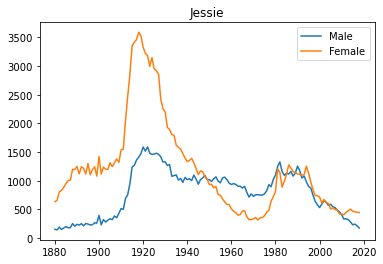

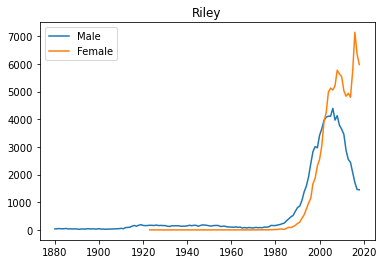

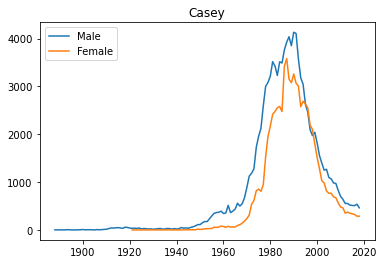

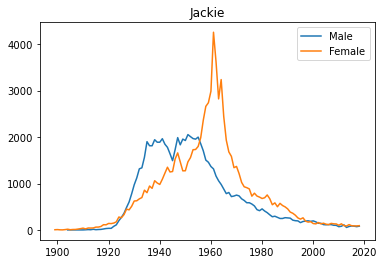

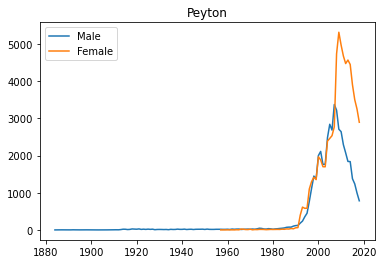

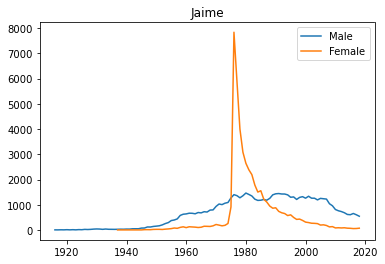

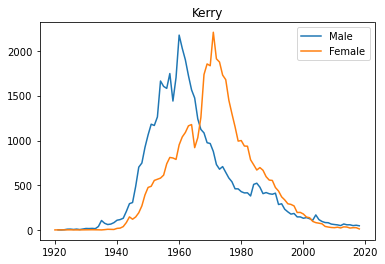

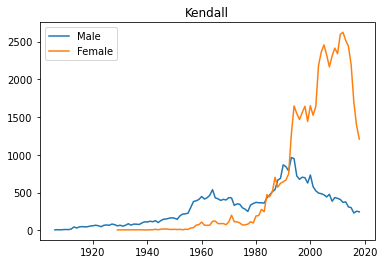

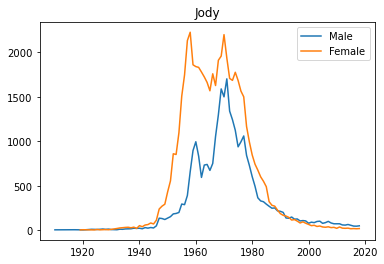

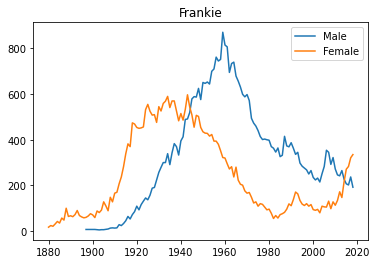

In [18]:
for i,name in enumerate(inAll.index):
        pp.plot(allyears_indexed.loc['M',name],label='Male')
        pp.plot(allyears_indexed.loc['F',name],label='Female')
        pp.title(name)
        pp.legend()
        pp.show()